<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/EDA_on_Solar_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
data_gen=pd.read_csv('/content/Gen.csv')
data_wms=pd.read_csv('/content/WMS.csv')

In [89]:
data_gen.head()

,Date_Time,INV,AC POWER,DC POWER,Daily_Yield,Total_Yield
0,25/07/24 00:00,INV-1,0.0,0.0,0,8854992.4
1,25/07/24 00:00,INV-2,0.0,0.0,0,8854992.4
2,25/07/24 00:00,INV-3,0.0,0.0,0,8854992.4
3,25/07/24 00:00,INV-4,0.0,0.0,0,8854992.4
4,25/07/24 00:00,INV-5,0.0,0.0,0,8854992.4


In [90]:
data_wms.head()

,Date_Time,POA,Ambeint_Temp,Module_Temp,Wind_Speed,Hor_Irradiation
0,26/07/24 00:00,-3,22.4,21.5,0.5,0.0
1,26/07/24 00:15,-3,22.4,21.2,0.5,0.0
2,26/07/24 00:30,-4,23.2,21.5,0.5,0.0
3,26/07/24 00:45,-2,23.3,22.3,0.5,0.0
4,26/07/24 01:00,-1,23.5,22.6,0.5,0.0


In [91]:
data_wms.tail()

,Date_Time,POA,Ambeint_Temp,Module_Temp,Wind_Speed,Hor_Irradiation
91,26/07/24 22:45,-1,24.4,23.5,0.5,0.0
92,26/07/24 23:00,0,24.3,23.5,0.5,0.0
93,26/07/24 23:15,-1,24.0,23.2,0.5,0.0
94,26/07/24 23:30,-3,23.3,22.4,0.5,0.0
95,26/07/24 23:45,-1,23.0,21.8,0.5,0.0


In [92]:
data_gen.tail()

,Date_Time,INV,AC POWER,DC POWER,Daily_Yield,Total_Yield
3739,25/07/24 23:45,INV-35,0.0,0.0,287,7971780.2
3740,25/07/24 23:45,INV-36,0.0,0.0,290,7971783.6
3741,25/07/24 23:45,INV-37,0.0,0.0,293,7971786.2
3742,25/07/24 23:45,INV-38,0.0,0.0,296,7971789.4
3743,25/07/24 23:45,INV-39,0.0,0.0,301,7971792.7


In [93]:
data_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date_Time    3744 non-null   object 
 1   INV          3744 non-null   object 
 2   AC POWER     3744 non-null   float64
 3   DC POWER     3744 non-null   float64
 4   Daily_Yield  3744 non-null   int64  
 5   Total_Yield  3744 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 175.6+ KB


In [94]:
data_wms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date_Time        96 non-null     object 
 1   POA              96 non-null     int64  
 2   Ambeint_Temp     96 non-null     float64
 3   Module_Temp      96 non-null     float64
 4   Wind_Speed       96 non-null     float64
 5   Hor_Irradiation  96 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ KB


In [95]:
data_gen.describe()

,AC POWER,DC POWER,Daily_Yield,Total_Yield
count,3744.000000,3744.000000,3744.000000,3.744000e+03
mean,70.372783,72.734989,885.218483,8.194506e+06
std,98.107458,100.680122,954.421710,9.268568e+05
min,0.000000,0.000000,0.000000,2.241061e+06
25%,0.000000,0.000000,0.000000,7.971496e+06
50%,1.150000,3.400000,264.000000,8.312399e+06
75%,121.400000,126.250000,1959.000000,8.435276e+06
max,411.600000,421.700000,2585.000000,9.950491e+06


In [96]:
data_wms.describe()

,POA,Ambeint_Temp,Module_Temp,Wind_Speed,Hor_Irradiation
count,96.000000,96.000000,96.000000,96.0,96.000000
mean,137.062500,25.517708,26.353125,0.5,142.996667
std,243.960601,2.299199,5.085810,0.0,242.511680
min,-6.000000,22.400000,21.200000,0.5,0.000000
25%,-1.000000,23.800000,22.900000,0.5,0.000000
50%,11.000000,24.800000,24.250000,0.5,10.000000
75%,145.250000,26.125000,27.400000,0.5,166.040000
max,1085.000000,31.800000,41.600000,0.5,1078.400000


In [97]:
data_gen.isnull()

,Date_Time,INV,AC POWER,DC POWER,Daily_Yield,Total_Yield
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3739,False,False,False,False,False,False
3740,False,False,False,False,False,False
3741,False,False,False,False,False,False
3742,False,False,False,False,False,False


In [98]:
data_wms.isnull()

,Date_Time,POA,Ambeint_Temp,Module_Temp,Wind_Speed,Hor_Irradiation
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
91,False,False,False,False,False,False
92,False,False,False,False,False,False
93,False,False,False,False,False,False
94,False,False,False,False,False,False


In [99]:
data_gen.isnull().sum()

Date_Time      0
INV            0
AC POWER       0
DC POWER       0
Daily_Yield    0
Total_Yield    0
dtype: int64

In [100]:
data_wms.isnull().sum()

Date_Time          0
POA                0
Ambeint_Temp       0
Module_Temp        0
Wind_Speed         0
Hor_Irradiation    0
dtype: int64

In [101]:
data_gen.columns

Index(['Date_Time', 'INV', 'AC POWER', 'DC POWER', 'Daily_Yield',
       'Total_Yield'],
      dtype='object')

In [102]:
# Changing the date formatl
data_gen['Date_Time'] = pd.to_datetime(data_gen['Date_Time'], format='%d/%m/%y %H:%M')


In [103]:
data_wms['Date_Time'] = pd.to_datetime(data_wms['Date_Time'], format='%d/%m/%y %H:%M')


In [104]:
data_gen.head()

,Date_Time,INV,AC POWER,DC POWER,Daily_Yield,Total_Yield
0,2024-07-25,INV-1,0.0,0.0,0,8854992.4
1,2024-07-25,INV-2,0.0,0.0,0,8854992.4
2,2024-07-25,INV-3,0.0,0.0,0,8854992.4
3,2024-07-25,INV-4,0.0,0.0,0,8854992.4
4,2024-07-25,INV-5,0.0,0.0,0,8854992.4


In [105]:
data_gen.describe()

,Date_Time,AC POWER,DC POWER,Daily_Yield,Total_Yield
count,3744,3744.000000,3744.000000,3744.000000,3.744000e+03
mean,2024-07-25 11:52:29.999999744,70.372783,72.734989,885.218483,8.194506e+06
min,2024-07-25 00:00:00,0.000000,0.000000,0.000000,2.241061e+06
25%,2024-07-25 05:56:15,0.000000,0.000000,0.000000,7.971496e+06
50%,2024-07-25 11:52:30,1.150000,3.400000,264.000000,8.312399e+06
75%,2024-07-25 17:48:45,121.400000,126.250000,1959.000000,8.435276e+06
max,2024-07-25 23:45:00,411.600000,421.700000,2585.000000,9.950491e+06
std,NaN,98.107458,100.680122,954.421710,9.268568e+05


In [106]:
data_gen['Daily_Yield'].mean()

885.2184829059829

In [109]:
data_wms['GTI']=0
data_wms.loc[data_wms['POA']>5,'GTI']=data_wms['POA']
data_wms.loc[data_wms['POA']<5,'GTI']=0
print(data_wms)

             Date_Time  POA  Ambeint_Temp  Module_Temp  Wind_Speed  \
0  2024-07-26 00:00:00   -3          22.4         21.5         0.5   
1  2024-07-26 00:15:00   -3          22.4         21.2         0.5   
2  2024-07-26 00:30:00   -4          23.2         21.5         0.5   
3  2024-07-26 00:45:00   -2          23.3         22.3         0.5   
4  2024-07-26 01:00:00   -1          23.5         22.6         0.5   
..                 ...  ...           ...          ...         ...   
91 2024-07-26 22:45:00   -1          24.4         23.5         0.5   
92 2024-07-26 23:00:00    0          24.3         23.5         0.5   
93 2024-07-26 23:15:00   -1          24.0         23.2         0.5   
94 2024-07-26 23:30:00   -3          23.3         22.4         0.5   
95 2024-07-26 23:45:00   -1          23.0         21.8         0.5   

    Hor_Irradiation  GTI  
0               0.0    0  
1               0.0    0  
2               0.0    0  
3               0.0    0  
4               0.0    0

In [110]:
irrad=data_wms['GTI'].sum()
cou=data_wms['GTI']>0
cou=cou.sum()
print(cou)
Irradiation=irrad/cou
print(Irradiation)
print(irrad)
data_wms['count']=0
data_wms.loc[data_wms['GTI']>0,'count']=1
data_wms.loc[data_wms['GTI']==0,'count']=0
print(data_wms)


49
269.61224489795916
13211
             Date_Time  POA  Ambeint_Temp  Module_Temp  Wind_Speed  \
0  2024-07-26 00:00:00   -3          22.4         21.5         0.5   
1  2024-07-26 00:15:00   -3          22.4         21.2         0.5   
2  2024-07-26 00:30:00   -4          23.2         21.5         0.5   
3  2024-07-26 00:45:00   -2          23.3         22.3         0.5   
4  2024-07-26 01:00:00   -1          23.5         22.6         0.5   
..                 ...  ...           ...          ...         ...   
91 2024-07-26 22:45:00   -1          24.4         23.5         0.5   
92 2024-07-26 23:00:00    0          24.3         23.5         0.5   
93 2024-07-26 23:15:00   -1          24.0         23.2         0.5   
94 2024-07-26 23:30:00   -3          23.3         22.4         0.5   
95 2024-07-26 23:45:00   -1          23.0         21.8         0.5   

    Hor_Irradiation  GTI  count  
0               0.0    0      0  
1               0.0    0      0  
2               0.0    0     

In [111]:
print(Irradiation)
Count=data_wms['count'].sum()
print(Count)
insolation=Irradiation*Count/4000
print(insolation)

269.61224489795916
49
3.3027499999999996


In [112]:
data_wms.head()

,Date_Time,POA,Ambeint_Temp,Module_Temp,Wind_Speed,Hor_Irradiation,GTI,count
0,2024-07-26 00:00:00,-3,22.4,21.5,0.5,0.0,0,0
1,2024-07-26 00:15:00,-3,22.4,21.2,0.5,0.0,0,0
2,2024-07-26 00:30:00,-4,23.2,21.5,0.5,0.0,0,0
3,2024-07-26 00:45:00,-2,23.3,22.3,0.5,0.0,0,0
4,2024-07-26 01:00:00,-1,23.5,22.6,0.5,0.0,0,0


In [113]:
data_wms[['Ambeint_Temp','Module_Temp']].max()

Ambeint_Temp    31.8
Module_Temp     41.6
dtype: float64

In [114]:
inv_list=data_gen['INV'].unique()
print(len(inv_list))
print(inv_list)

39
['INV-1' 'INV-2' 'INV-3' 'INV-4' 'INV-5' 'INV-6' 'INV-7' 'INV-8' 'INV-9'
 'INV-10' 'INV-11' 'INV-12' 'INV-13' 'INV-14' 'INV-15' 'INV-16' 'INV-17'
 'INV-18' 'INV-19' 'INV-20' 'INV-21' 'INV-22' 'INV-23' 'INV-24' 'INV-25'
 'INV-26' 'INV-27' 'INV-28' 'INV-29' 'INV-30' 'INV-31' 'INV-32' 'INV-33'
 'INV-34' 'INV-35' 'INV-36' 'INV-37' 'INV-38' 'INV-39']


In [115]:
data_gen[['AC POWER','DC POWER']].max()
data_gen[['AC POWER','DC POWER']].idxmax(axis=0)

AC POWER    1716
DC POWER    1716
dtype: int64

In [116]:
data_gen['INV'][2234]

'INV-12'

,POA,Ambeint_Temp,Module_Temp,Hor_Irradiation,GTI,count
POA,1.000000,0.866644,0.900290,0.872451,0.999986,0.557676
Ambeint_Temp,0.866644,1.000000,0.982588,0.898780,0.865594,0.665373
Module_Temp,0.900290,0.982588,1.000000,0.919903,0.899592,0.643750
Hor_Irradiation,0.872451,0.898780,0.919903,1.000000,0.872234,0.579775
GTI,0.999986,0.865594,0.899592,0.872234,1.000000,0.556079
count,0.557676,0.665373,0.643750,0.579775,0.556079,1.000000


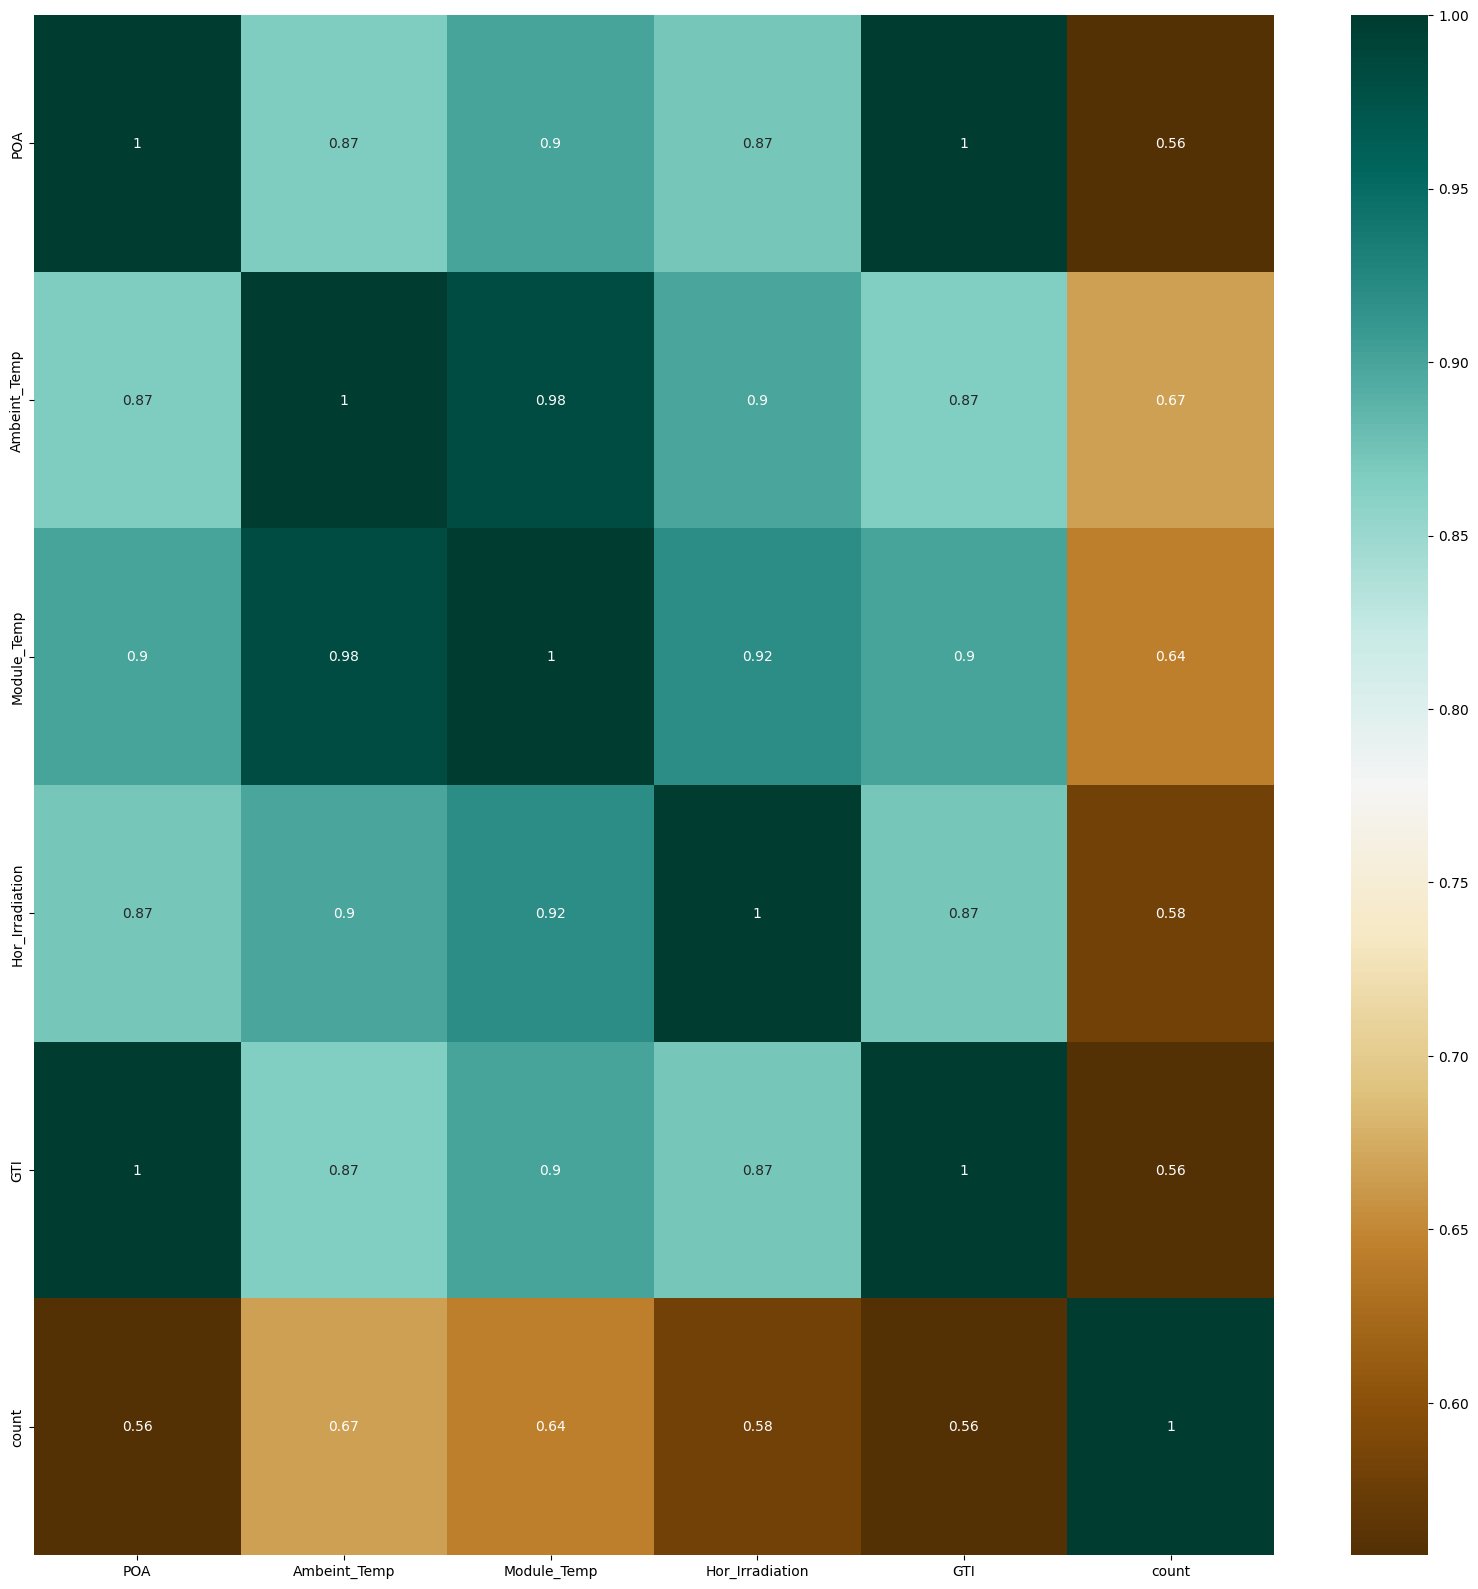

In [117]:
plt.figure(figsize=(20,20))
data_WMS=data_wms.drop(columns=['Date_Time','Wind_Speed'])
c=data_WMS.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

Text(0.5, 0.95, 'Date: 2024-07-25')

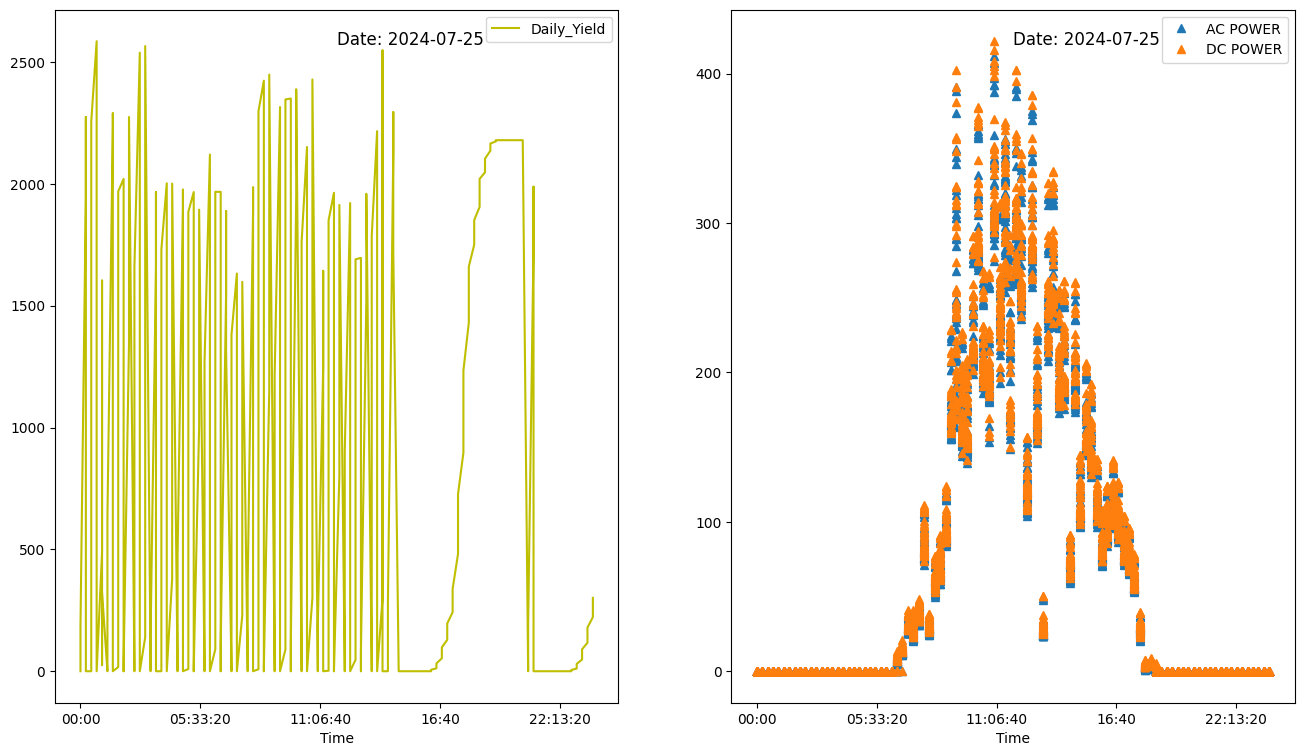

In [118]:
temp_gen=data_gen.copy()
temp_gen['Date_Time'] = pd.to_datetime(temp_gen['Date_Time'])
temp_gen['Date'] = temp_gen['Date_Time'].dt.date
temp_gen['Time']=temp_gen['Date_Time'].dt.time
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(16,9))
temp_gen.plot(x='Time',y='Daily_Yield',color='y',ax=ax[0])
ax[0].text(0.5, 0.95, f'Date: {date}', transform=ax[0].transAxes, ha='left', fontsize=12)
temp_gen.plot(x='Time', y="AC POWER", style='^',ax=ax[1])
temp_gen.plot(x='Time', y= 'DC POWER', style='^',ax=ax[1])
date = data_gen['Date_Time'].iloc[0].strftime('%Y-%m-%d')
ax[1].text(0.5, 0.95, f'Date: {date}', transform=ax[1].transAxes, ha='left', fontsize=12)

In [119]:
temp_gen1=data_gen.copy()
temp_gen1['Date_Time'] = pd.to_datetime(temp_gen['Date_Time'])
temp_gen1['Date'] = temp_gen['Date_Time'].dt.date
temp_gen1['Time']=temp_gen['Date_Time'].dt.time
temp_wms1=data_wms.copy()
temp_wms1['Date_Time']=pd.to_datetime(temp_wms1['Date_Time'])
temp_wms1['Date']=temp_wms1['Date_Time'].dt.date
temp_wms1['Time'] = temp_wms1['Date_Time'].dt.time
# for columns
cols=temp_gen1.groupby(['Time','Date'])['DC POWER'].mean().unstack()
print(cols)

Date      2024-07-25
Time                
00:00:00         0.0
00:15:00         0.0
00:30:00         0.0
00:45:00         0.0
01:00:00         0.0
...              ...
22:45:00         0.0
23:00:00         0.0
23:15:00         0.0
23:30:00         0.0
23:45:00         0.0

[96 rows x 1 columns]


Text(0.5, 1.0, 'DC POWER')

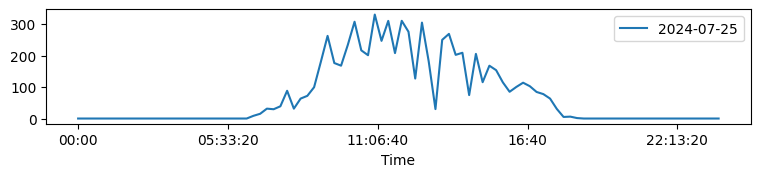

In [125]:
ax=temp_gen1.groupby(['Time',"Date"])['DC POWER'].mean().unstack().plot(sharex=True,subplots=True,
layout=(17,2),figsize=(20,30))
plt.title('DC POWER')

Text(0.5, 1.0, 'AC POWER')

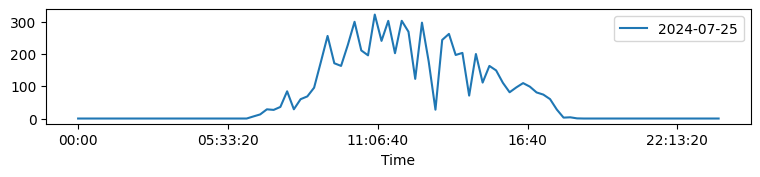

In [127]:
ax=temp_gen1.groupby(['Time',"Date"])['AC POWER'].mean().unstack().plot(sharex=True,subplots=True,
layout=(17,2),figsize=(20,30))
plt.title('AC POWER')